In [61]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [62]:
y_train = train.iloc[:,1]

In [63]:
train = train.drop('Survived', axis =1)
df = pd.concat([train, test])

In [64]:
df.shape

(1309, 11)

In [65]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [66]:
df = df.drop('Ticket', axis = 1).drop('Cabin', axis = 1)

In [67]:
#欠損値は値の数が一番多いSで埋める
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [68]:
df['Embarked'].fillna('S', inplace = True)

In [69]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [70]:
df['Fare'].fillna(df.Fare.mean(), inplace = True)

In [71]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [72]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [73]:
import seaborn as sns

In [74]:
df['FamilySize'] = df['SibSp'] + df['Parch']

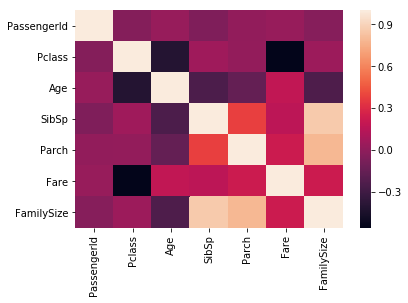

In [75]:
sns.heatmap(df.corr())

In [76]:
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [77]:
sex_dum = pd.get_dummies(df['Sex'])

In [78]:
df = pd.concat((df, sex_dum), axis = 1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,female,male
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,1,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,1,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,0,0,1


In [79]:
df =df.drop(['Sex', 'female'], axis = 1)

In [80]:
emb_dum = pd.get_dummies(df['Embarked'])

In [81]:
df = pd.concat((df, emb_dum), axis = 1)

In [82]:
df =df.drop(['Embarked', 'S'], axis = 1)

In [83]:
import matplotlib.pyplot as plt

([array([ 18.,  27., 114., 104.,  66.,  46.,  24.,  15.,   9.,   1.]),
  array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.])],
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 2 Lists of Patches objects>)

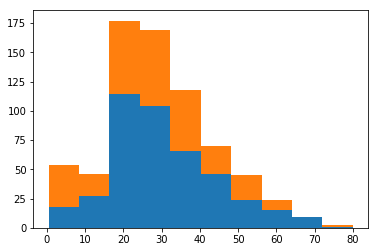

In [84]:
#二つのカラムを０と１で分類し、可視化する
train = pd.read_csv('train.csv')
split_data = []
for survived in [0,1]:
    split_data.append(train[train.Survived==survived])

temp = [i["Age"].dropna() for i in split_data]
plt.hist(temp, histtype="barstacked", bins=10)

### Mrs,Miss, Master, Mrで年齢を推定する

In [112]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame()
    for name in name_df:        
        if 'Miss' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)
    return name_class_df

In [113]:
# name_class_df = pd.DataFrame()
# for name in df.iloc[:,2]:
#     if 'Miss' in name:
#         df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
#     elif 'Mrs' in name:
#         df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
#     elif 'Master' in name:
#         df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
#     elif 'Mr' in name:
#         df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
#     else:
#         df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
#     name_class_df = name_class_df.append(df,ignore_index=True)

In [114]:
name = df.Name
name_class = name_classifier(name)

In [115]:
name_class

,miss,mrs,master,mr
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
5,0,0,0,1
6,0,0,0,1
7,0,0,1,0
8,0,1,0,0
9,0,1,0,0


In [116]:
#1つ目のif文でAgeに値が入っているかを分岐
#2つ目のif文でmrs,master,mr,missの値と数をカウント
#最後に平均を出す
def avg_age(df, df_name):
    miss=0
    mrs=0
    master=0
    mr=0
    c_miss=0
    c_mrs=0
    c_master=0
    c_mr=0
    for i in range(1309):
        if df.isnull().iloc[i,3]==False:
            if df_name.iloc[i,0]==1:
                miss=miss+df.iloc[i,3]
                c_miss=c_miss+1
            if df_name.iloc[i,1]==1:
                mrs=mrs+df.iloc[i,3]
                c_mrs=c_mrs+1
            if df_name.iloc[i,2]==1:
                master=master+df.iloc[i,3]
                c_master=c_master+1
            if df_name.iloc[i,3]==1:
                mr=mr+df.iloc[i,3]
                c_mr=c_mr+1
    return [miss/c_miss,mrs/c_mrs,master/c_master,mr/c_mr]

In [117]:
avg_age(df, name_class)

[21.774238095238097, 36.98255813953488, 5.482641509433963, 32.28092783505155]

In [118]:
name_class.head()

,miss,mrs,master,mr
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [122]:
df.head()

,PassengerId,Pclass,Name,Age,Fare,FamilySize,male,C,Q
0,1,3,"Braund, Mr. Owen Harris",22.0,7.2500,1,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,1,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,7.9250,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,1,0,0,0
4,5,3,"Allen, Mr. William Henry",35.0,8.0500,0,1,0,0


In [125]:
for i in range(1309):
    if df.isnull().iloc[i,3]==True:
        if name_class.iloc[i,0]==1:
            df.iloc[i,3]=21.8
        elif name_class.iloc[i,1]==1:
            df.iloc[i,3]=37
        elif name_class.iloc[i,2]==1:
            df.iloc[i,3]=5.5
        elif name_class.iloc[i,3]==1:
            df.iloc[i,3]=32.3

In [126]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Age            2
Fare           0
FamilySize     0
male           0
C              0
Q              0
dtype: int64

In [127]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df = df.drop('Name', axis = 1)

In [128]:
df.head()

,PassengerId,Pclass,Age,Fare,FamilySize,male,C,Q
0,1,3,22.0,7.2500,1,1,0,0
1,2,1,38.0,71.2833,1,0,1,0
2,3,3,26.0,7.9250,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,0
4,5,3,35.0,8.0500,0,1,0,0


In [134]:
train_data = df.iloc[0:891,:]
test_data = df.iloc[891:,:]

id_test = test_data.iloc[:,0]

x_train = train_data.drop('PassengerId', axis = 1)
x_test = test_data.drop('PassengerId', axis = 1)

In [142]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
#GridSearchCVでハイパーパラメータの最適値を求める 
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[10,100,500,1000],'max_depth':[3,6,12],'criterion':['gini','entropy'],'random_state':[7]}
grid_forest = GridSearchCV(forest,param) #defaultではcv=3なのでデータを3つに分け、3回交差検証が行われます
grid_forest.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 500, 1000], 'max_depth': [3, 6, 12], 'criterion': ['gini', 'entropy'], 'random_state': [7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [143]:
grid_forest.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 10, 'random_state': 7}

In [145]:
best_forest = RandomForestClassifier(max_depth = 6, n_estimators = 10, criterion = 'entropy', random_state = 7)

In [146]:
best_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [149]:
result = np.array(best_forest.predict(x_test))
df_result=pd.DataFrame(result,columns=['Survived'])
df_result=pd.concat([id_test,df_result],axis=1)
df_result['Survived'] = np.array(round(df_result['Survived']), dtype='int')
df_result.to_csv('result.csv', index=False)